<a href="https://colab.research.google.com/github/Morrissenzeyi/Course-Project-exploratory-data-analysis/blob/master/Independent_Project_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the Question

Data analysis question: The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 

##Defining the Metric for Success

Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

##c) Understanding the context

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

##Recording the Experimental Design

Perform univariate, bivariate and multivariate analysis recording your observations.

##  Data Relevance

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

#Importing libraries

In [ ]:
# Importing Pandas 
import pandas as pd
# Importing Numpy
import numpy as np
# Importing Seaborn
import seaborn as sns
# Importing Matplotlib
import matplotlib.pyplot as plt

# Creating a dataframe

In [ ]:
df = pd.read_csv("/content/Financial Dataset - 1.csv")

#Preview the dataset

In [ ]:
# preview the top of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# preview the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# checking the number of records of our dataset
len(df)

23524

In [ ]:
# checking the datatypes
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
df.describe()

,year,household_size,Respondent Age
count,22613.000000,22613.000000,22613.000000
mean,2016.969619,3.481803,38.900057
std,0.898338,1.980934,16.565412
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,8.000000,100.000000


In [ ]:
#Converting datatypes
#convert column year from int64 to datetime
#and residence to category
df['country'] = df['country'].astype('category')
df['Has a Bank account'] = df['Has a Bank account'].astype('category')
df['Type of Location'] = df['Type of Location'].astype('category')
df['gender_of_respondent'] = df['gender_of_respondent'].astype('category')
df['Level of Educuation'] = df['Level of Educuation'].astype('category')
df['year']= pd.to_datetime(df['year']) 
df['Type of Job'] = df['Type of Job'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22613 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 22613 non-null  category      
 1   year                    22613 non-null  datetime64[ns]
 2   uniqueid                22613 non-null  object        
 3   Has a Bank account      22613 non-null  category      
 4   Type of Location        22613 non-null  category      
 5   Cell Phone Access       22613 non-null  object        
 6   household_size          22613 non-null  float64       
 7   Respondent Age          22613 non-null  float64       
 8   gender_of_respondent    22613 non-null  category      
 9   The relathip with head  22613 non-null  object        
 10  marital_status          22613 non-null  object        
 11  Level of Educuation     22613 non-null  category      
 12  Type of Job             22613 non-null  catego

In [ ]:
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


# Tidying the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


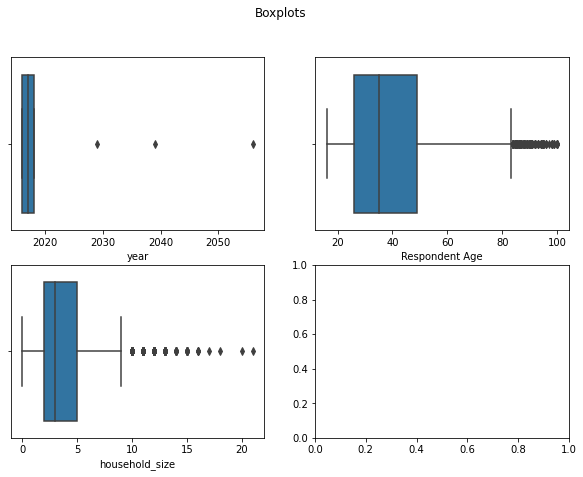

In [ ]:
# checking for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['year'], ax=ax1)

sns.boxplot(df['Respondent Age'], ax=ax2)
sns.boxplot(df['household_size'], ax=ax3)
plt.show()

In [ ]:
# removing the outliers
#Removing the outliers/anomalies using percentile
threshold = df['household_size'].quantile(0.95)
threshold
df = df[df['household_size']<= threshold]
df.shape
df.describe()
df['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 0.])

In [ ]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Checking for Anomalies
#



q1_games = df['year'].quantile(.25)
q3_games = df['year'].quantile(.75)

iqr_games = q3_games - q1_games

q1_games = df['household_size'].quantile(.25)
q3_games = df['household_size'].quantile(.75)

iqr_games = q3_games - q1_games

q1_games = df['Respondent Age'].quantile(.25)
q3_games = df['Respondent Age'].quantile(.75)

iqr_games = q3_games - q1_games



In [ ]:
# Identifying the Missing Data
#
df.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size             0
Respondent Age            25
gender_of_respondent      29
The relathip with head     0
marital_status            27
Level of Educuation       28
Type of Job               29
dtype: int64

In [ ]:
# dropping all missing values
df.dropna(inplace = True)

In [ ]:
# checking for missed values
df.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

# 1.1 Univariate


In [ ]:
#Frequency tables
df.country.value_counts()

Rwanda      8441
Tanzania    6490
Kenya       5824
Uganda      1858
Name: country, dtype: int64

In [ ]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


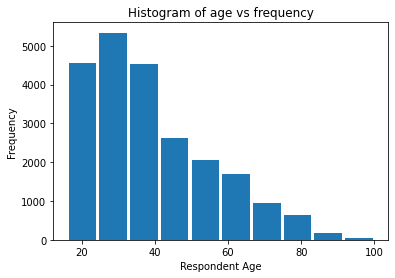

In [ ]:
#Plotting a age histogram
age_points = df['Respondent Age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
# apparently many population in the dataset is between the ages of 25 and 30.

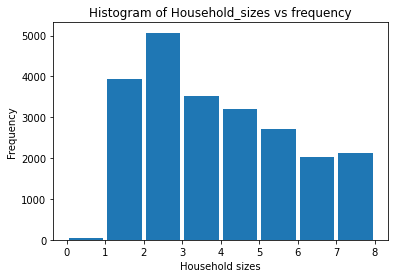

In [ ]:
#Plotting a age histogram
size_points = df['household_size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Household_sizes vs frequency')
plt.show()
# A lot of population in the dataset has a household size of between 2 to 3

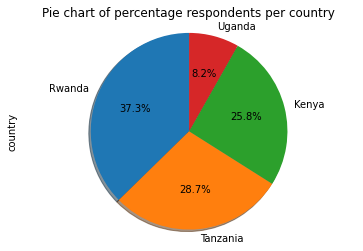

In [ ]:
# pie chart for countries
df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
# Apparently Rwanda has the highest number of respondents in this study at 34.2% and Uganda the least at 10.6%

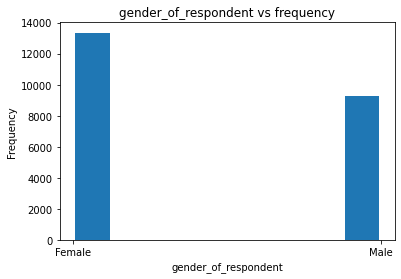

In [ ]:
# Plotting a age histogram

size_points = df['gender_of_respondent']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('gender_of_respondent')
plt.ylabel('Frequency')
plt.title('gender_of_respondent vs frequency')
plt.show()

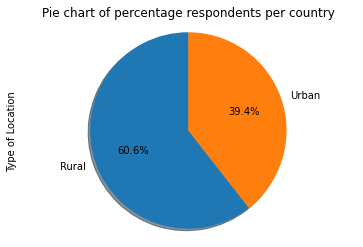

In [ ]:
df['Type of Location'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
# Apparently a large number lives in rural area

#1.2 BIVARIATE

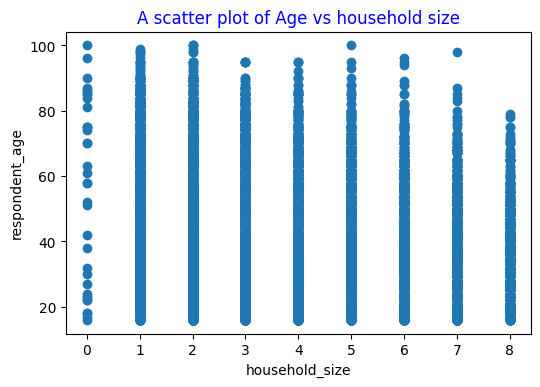

In [ ]:
# This is the analysis of two different variables to find their causes and relationships between them 


plt.figure(dpi = 100)

# plotting our scatterplot 
plt.scatter(df['household_size'], df['Respondent Age'])

# scatterplot title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondent_age')

# displaying our scatterplot 
plt.show()


# There is no correlation between age and household size in the dataset as the points are scattered throughout the graph.


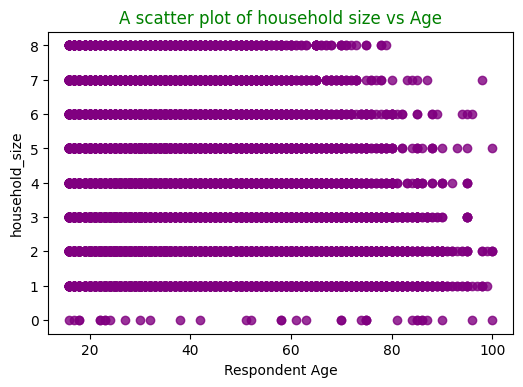

In [ ]:
# Creating and displaying the scatter plot
plt.figure(dpi = 100)
sns.regplot(x= df['Respondent Age'], y= df['household_size'], fit_reg = False, color = 'purple')
plt.title("A scatter plot of household size vs Age", color = 'green')
plt.show()

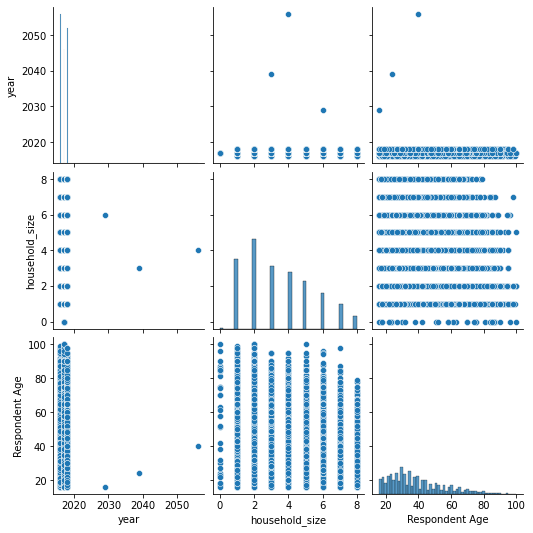

In [ ]:
# displaying all plots
sns.pairplot(df)
plt.show()

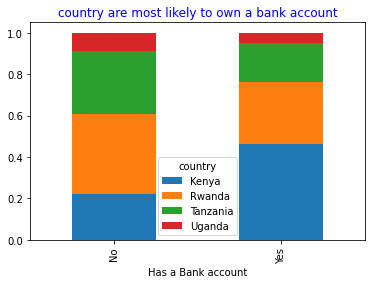

In [ ]:
#People from which country are most likely to own a bank account
ax5 = df.groupby('Has a Bank account')['country'].value_counts(normalize=True).unstack()
ax5.plot(kind='bar', stacked='True',title=str(ax1))
plt.title("Country are most likely to own a bank account", color = 'blue')
int_level = df['Has a Bank account'].value_counts()
# People from Kenya are most likely to have a bank account and Uganda people are less likely to have a bank account

#1.3 MULTIVARIATE

### Checking for relationships between dependent and independent variable

In [ ]:
df.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [ ]:
#Checking for relationship between dependent variable and independent variable
dff= df.copy()
dff.head(3)
to_nums = {"Has a Bank account": {"Yes": 1, "No": 0},
           "Type of Location": {"Rural": 0, "Urban": 1},
           "gender_of_respondent": {"Female": 2, "Male": 3}}
import scipy.stats as stats

#To convert the columns to numbers using replace :
dff.replace(to_nums, inplace=True)
print(dff.head())
print(dff.info())
#calculate point-biserial correlation
x = dff['Has a Bank account']
y = dff['Respondent Age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account

x = dff['Has a Bank account']
y = dff['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = dff['Has a Bank account']
y = dff['Type of Location']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

x = dff['Has a Bank account']
y = dff['gender_of_respondent']
stats.pointbiserialr(x, y)
#There is a weak correlation between gender and having a bank account

  country  year  ...              Level of Educuation                Type of Job
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22613 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22613 non-null  object 
 1   year                    22613 non-null  int64  
 2   uniqueid                22613 non-null  object 
 3   Has a Bank account      22613 non-null  int64  
 4   Type of Location        22613 non-null  int64  
 5   Cell P

PointbiserialrResult(correlation=0.1165345357655668, pvalue=3.325943954154198e-69)

### Reduction Techniques

In [ ]:
#dividing data into labels and feature set
x = df.iloc[:, 4:6].values
y = df.iloc[:, 2].values
x
y

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_2114',
       'uniqueid_2115', 'uniqueid_2116'], dtype=object)

In [ ]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#performing feature scaling:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



ValueError: ignored

In [ ]:
#performing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
x_test
x_train

ValueError: ignored

In [ ]:
#using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

ValueError: ignored

In [ ]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

NameError: ignored

# Challenging the solution

# Follow up questions

a). Did we have the right data?

yes

b). Do we need other data to answer our question?

no

c). Did we have the right question?

yes